## **Importing Libraries:**

In [ ]:
import ipaddress
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.utils import resample
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import mutual_info_classif

## **Loading The Dataset:**

In [3]:
df = pd.read_csv("./DATASET/FULL-DATASET/fullDF.csv")

C:\Users\avina\AppData\Local\Temp\ipykernel_9576\2122497359.py:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./DATASET/FULL-DATASET/fullDF.csv")


In [4]:
df

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,0.285356,986,86,62,...,,10,8,4,5,3,1,7,NaN,0
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,0.314311,1540,1644,31,...,,14,6,8,12,5,1,6,NaN,0
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,0.301180,536,304,31,...,0,9,16,7,6,1,1,3,NaN,0
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000009,114,0,254,...,,33,33,17,17,17,17,33,Generic,1
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,0.001079,146,178,31,...,,2,2,5,4,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540038,59.166.0.8,34415,149.171.126.0,5190,tcp,FIN,0.008119,1920,4312,31,...,0,3,10,4,1,1,1,1,NaN,0
2540039,59.166.0.8,56352,149.171.126.2,53,udp,CON,0.001047,130,162,31,...,,1,1,2,6,1,1,1,NaN,0
2540040,59.166.0.9,25527,149.171.126.4,6881,tcp,FIN,0.013106,1540,1644,31,...,,12,11,8,9,6,1,6,NaN,0
2540041,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000003,114,0,254,...,,37,37,26,26,26,13,37,Generic,1


### **Removing Leading and Trailing Spcaes From Objects:**

In [5]:
# Striping spaces from all string values in columns of type 'object'
df.loc[:, df.dtypes == 'object'] = df.select_dtypes(include=['object']).apply(
    lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x)
)



# and striping spaces from column names
df.columns = df.columns.str.strip()




df.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object')

## **Basic Statistiscal info about the datasets:**


In [6]:
df.describe(include='object')

,srcip,sport,dstip,dsport,proto,state,service,ct_ftp_cmd,attack_cat
count,2540043,2540043,2540043,2540043,2540043,2540043,2540043,2540043,321283
unique,43,116320,47,111509,135,16,13,9,10
top,59.166.0.4,1043,149.171.126.3,53,tcp,FIN,-,,Generic
freq,197959,208958,197771,701054,1495071,1478686,1246395,1429877,215481


In [7]:
print("Dataframe Info:")
print(df.info())

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540043 entries, 0 to 2540042
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26

In [8]:
column_data_types = df.dtypes

# Numerical and categorical columns
numerical_count = 0
categorical_count = 0


for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1


print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 40 Numerical Columns in dataset
There are 9 Categorical Columns in dataset


In [9]:
print("Dataset Dimensions (rows, columns):", df.shape)

Dataset Dimensions (rows, columns): (2540043, 49)


# **Data Preprocessing for EDA**


### **Checking for Missing Data**

We will check if there are any missing values in datasets.


In [10]:
# Total Numbers and percentage of missing values

print("Missing values in Training Data:")

missing_count = df.isnull().sum()
missing_percentage = df.isnull().mean() * 100

missing_data = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage (%)': missing_percentage
})

print(missing_data)


Missing values in Training Data:
                  Missing Count  Missing Percentage (%)
srcip                         0                0.000000
sport                         0                0.000000
dstip                         0                0.000000
dsport                        0                0.000000
proto                         0                0.000000
state                         0                0.000000
dur                           0                0.000000
sbytes                        0                0.000000
dbytes                        0                0.000000
sttl                          0                0.000000
dttl                          0                0.000000
sloss                         0                0.000000
dloss                         0                0.000000
service                       0                0.000000
Sload                         0                0.000000
Dload                         0                0.000000
Spkts          

- Replacing the unknown value(-) with 'others' in 'state' and 'service'

In [11]:
df['state'] = df['state'].replace('-', 'others')
df['service'] = df['service'].replace('-', 'others')

In [12]:
value_counts = df['attack_cat'].value_counts()
print(value_counts)

attack_cat
Generic           215481
Exploits           44525
Fuzzers            24246
DoS                16353
Reconnaissance     13987
Analysis            2677
Backdoor            1795
Shellcode           1511
Backdoors            534
Worms                174
Name: count, dtype: int64


In [13]:
df['attack_cat'] = df['attack_cat'].apply(lambda item: 'Backdoor' if item =='Backdoors' else item)

In [14]:
value_counts = df['attack_cat'].value_counts()
print(value_counts)

attack_cat
Generic           215481
Exploits           44525
Fuzzers            24246
DoS                16353
Reconnaissance     13987
Analysis            2677
Backdoor            2329
Shellcode           1511
Worms                174
Name: count, dtype: int64


In [15]:
# Filling missing values in attack_cat with 'Normal'
if 'attack_cat' in df.columns:
    df['attack_cat'] = df['attack_cat'].fillna('Normal')
    
print(len(df[df['attack_cat'] == 'Normal']))

2218760


In [16]:
# Dropping the 'ct_flw_http_mthd' column
if 'ct_flw_http_mthd' in df.columns:
    df = df.drop(columns=['ct_flw_http_mthd'])

## **Balancing The Normal Category Data from easy Computation as per resources**

In [17]:
# Separating the 'Normal' and non-'Normal' categories
normal_data = df[df['attack_cat'] == 'Normal']
non_normal_data = df[df['attack_cat'] != 'Normal']


# Downsample the 'Normal' category
normal_undersampled = resample(normal_data, 
                               replace=False,    # Don't sample with replacement
                               n_samples=400000, 
                               random_state=42)  # For reproducibility


# Combine the downsampled 'Normal' data with the non-'Normal' data
df_resampled = pd.concat([normal_undersampled, non_normal_data])


# Optional: Shuffle the dataset to mix the data
df_resampled = df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)


# Handle any missing values if needed (as in your earlier code)
if 'is_ftp_login' in df_resampled.columns:
    df_resampled['is_ftp_login'] = df_resampled['is_ftp_login'].fillna(0.0)


# Remaining missing values
print("Remaining missing values:")
print(df_resampled.isnull().sum())


Remaining missing values:
srcip               0
sport               0
dstip               0
dsport              0
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
Sload               0
Dload               0
Spkts               0
Dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
Sjit                0
Djit                0
Stime               0
Ltime               0
Sintpkt             0
Dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ ltm         0
ct_src_dport_ltm    0
ct_dst

In [18]:
# New distribution
print("New attack category distribution:")
print(df_resampled['attack_cat'].value_counts())

New attack category distribution:
attack_cat
Normal            400000
Generic           215481
Exploits           44525
Fuzzers            24246
DoS                16353
Reconnaissance     13987
Analysis            2677
Backdoor            2329
Shellcode           1511
Worms                174
Name: count, dtype: int64


In [19]:
print("New size of the dataset after dropping missing values and re-sampling:", df_resampled.shape)

New size of the dataset after dropping missing values and re-sampling: (721283, 48)


# **Checking for Redundant Data**

Check for duplicate rows in the resampled datasets


In [20]:
print("Duplicate rows in Training Data:", df_resampled.duplicated().sum())

# Drop duplicate rows
df_resampled = df_resampled.drop_duplicates()

print("Remaining duplicate rows:", df_resampled.duplicated().sum())

Duplicate rows in Training Data: 217037
Remaining duplicate rows: 0


# **Detecting Outliers**

We can look at the statistical summary of the data, and for each numerical column, we can check for unusually high or low values by identifying those beyond a certain range.


In [21]:
print("Statistical Summary of Training Data:")
display(df_resampled.describe().transpose())

Statistical Summary of Training Data:


,count,mean,std,min,25%,50%,75%,max
dur,504246.0,7.900345e-01,1.294768e+01,0.000000e+00,1.054000e-03,2.123750e-02,4.224105e-01,8.760776e+03
sbytes,504246.0,6.756750e+03,1.244027e+05,0.000000e+00,2.000000e+02,1.168000e+03,3.022000e+03,1.435577e+07
dbytes,504246.0,3.471767e+04,1.722382e+05,0.000000e+00,1.780000e+02,1.644000e+03,1.016800e+04,1.465753e+07
sttl,504246.0,8.232344e+01,9.146094e+01,0.000000e+00,3.100000e+01,3.100000e+01,6.200000e+01,2.550000e+02
dttl,504246.0,5.025588e+01,7.512407e+01,0.000000e+00,2.900000e+01,2.900000e+01,2.900000e+01,2.540000e+02
sloss,504246.0,5.945566e+00,4.733085e+01,0.000000e+00,0.000000e+00,2.000000e+00,7.000000e+00,5.319000e+03
dloss,504246.0,1.561026e+01,6.132333e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.200000e+01,5.507000e+03
Sload,504246.0,3.413617e+07,1.326028e+08,0.000000e+00,4.942733e+04,5.567207e+05,1.856375e+06,5.988000e+09
Dload,504246.0,2.219631e+06,4.077293e+06,0.000000e+00,5.029381e+03,3.269581e+05,1.700270e+06,2.337861e+07
Spkts,504246.0,3.333341e+01,1.112865e+02,0.000000e+00,2.000000e+00,1.200000e+01,4.200000e+01,1.064600e+04


# **Checking Unique Values Of Attributes**


In [22]:
cols = df_resampled.columns

for column in cols:
    print('Unique values of', column, 
          'with dtype', df_resampled[column].dtype, 
          'have total values', df_resampled[column].nunique(), '->\n',  df_resampled[column].unique())

    print()
    print('.'*100)
    print()

Unique values of srcip with dtype object have total values 42 ->
 ['175.45.176.3' '149.171.126.18' '59.166.0.6' '59.166.0.9' '59.166.0.4'
 '59.166.0.3' '59.166.0.5' '59.166.0.1' '59.166.0.8' '59.166.0.7'
 '59.166.0.2' '175.45.176.2' '175.45.176.1' '175.45.176.0'
 '149.171.126.10' '59.166.0.0' '149.171.126.15' '149.171.126.14'
 '10.40.85.1' '149.171.126.12' '10.40.182.6' '10.40.85.30' '10.40.170.2'
 '149.171.126.1' '149.171.126.4' '10.40.182.1' '149.171.126.7'
 '10.40.85.10' '10.40.182.3' '149.171.126.13' '149.171.126.9'
 '149.171.126.8' '149.171.126.6' '149.171.126.2' '149.171.126.5'
 '149.171.126.3' '149.171.126.0' '192.168.241.243' '149.171.126.11'
 '149.171.126.17' '149.171.126.16' '149.171.126.19']

....................................................................................................

Unique values of sport with dtype object have total values 82958 ->
 [1043 58086 41318 ... '15060' '53526' '8491']

.....................................................................

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

- In column 'is_ftp_login' unique values are [0. 1. 2. 4.] which is not correct because according to given NB15_features.csv this column is a binary column


# **Handling is_ftp_login**


In [23]:
def convert_to_binary(df_resampled, column):
    df_resampled[column] = (df_resampled[column] > 0).astype(int)
    return df_resampled

# Convert to binary
column = 'is_ftp_login'
df_resampled = convert_to_binary(df_resampled, column)

# Print only the 'is_ftp_login' column
print(df_resampled['is_ftp_login'].unique())


[0 1]


# **Class Imbalance**

We will check for class imbalance using the 'Label' column, which represents whether a record is normal or an attack.

Additionally, we'll inspect the 'attack_cat' column to check the distribution of attack types.

Class distribution in the Dataset ('Label' column):
        Count  Percentage (%)
Label                        
0      378613       75.084978
1      125633       24.915022


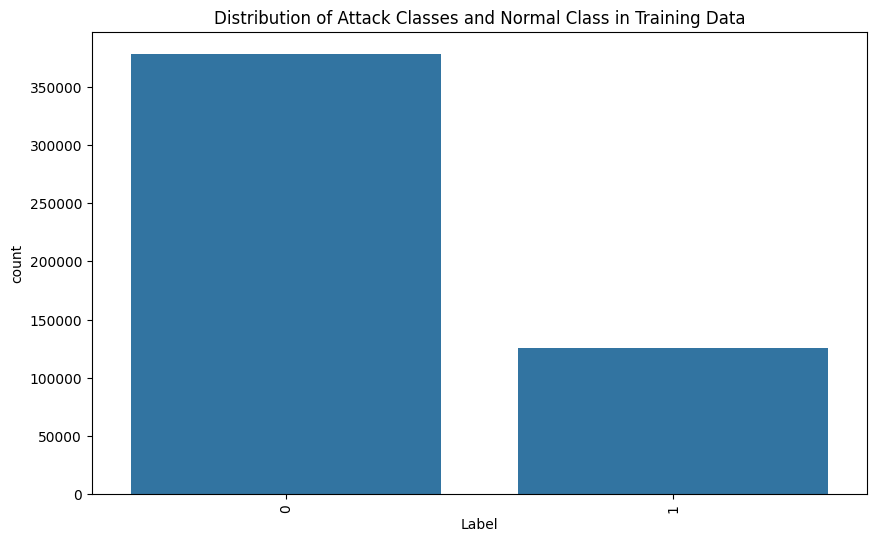

In [24]:
# Class distribution
print("Class distribution in the Dataset ('Label' column):")


lebel_counts = df_resampled['Label'].value_counts()
lebel_percentages = df_resampled['Label'].value_counts(normalize=True) * 100


lebel_distribution = pd.DataFrame(
    {
        'Count': lebel_counts,
        'Percentage (%)': lebel_percentages
    }
)


print(lebel_distribution)


plt.figure(figsize=(10, 6))

sns.countplot(data=df_resampled, 
              x='Label',
              order=df_resampled['Label'].value_counts().index)

plt.xticks(rotation=90)
plt.title('Distribution of Attack Classes and Normal Class in Training Data')
plt.show()

In [25]:
fig = px.pie(
    lebel_counts,
    values=lebel_counts.values,
    names=lebel_counts.index,
    title='Distribution of Label'
)

fig.show()

Checking for Imbalances Between Different Attack Classes

If the label column contains both normal and attack classes, we will want to check how many samples are available for each specific attack class.

This can help identify if some attack classes are underrepresented or overrepresented.



Attack categories distribution('attack_cat' column):
                  Count  Percentage (%)
attack_cat                             
Normal          2218760       87.351277
Generic          215481        8.483360
Exploits          44525        1.752923
Fuzzers           24246        0.954551
DoS               16353        0.643808
Reconnaissance    13987        0.550660
Analysis           2677        0.105392
Backdoor           2329        0.091691
Shellcode          1511        0.059487
Worms               174        0.006850


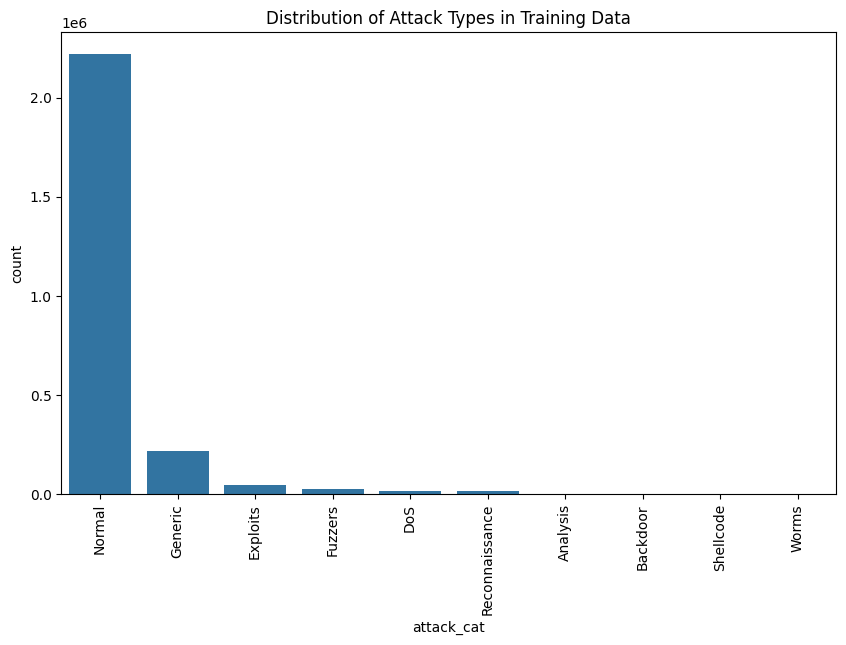

In [26]:
# Attack categories distribution
print("\nAttack categories distribution('attack_cat' column):")

attack_counts = df['attack_cat'].value_counts()
attack_percentages = df['attack_cat'].value_counts(
    normalize=True) * 100


attack_distribution = pd.DataFrame(
    {
        'Count': attack_counts,
        'Percentage (%)': attack_percentages
    }
)

print(attack_distribution)

plt.figure(figsize=(10, 6))

sns.countplot(data=df, 
              x='attack_cat',
              order=df['attack_cat'].value_counts().index)

plt.xticks(rotation=90)
plt.title('Distribution of Attack Types in Training Data')
plt.show()

# **Most Used Service By Attack Category**


In [27]:
df_attacks_cat_services = df_resampled[(df_resampled['attack_cat'] != 'normal')].groupby(
    ['attack_cat', 'service']).size().reset_index(name='Count')

df_attacks_cat_services.reset_index()

,index,attack_cat,service,Count
0,0,Analysis,http,442
1,1,Analysis,others,1888
2,2,Analysis,smtp,6
3,3,Backdoor,ftp,7
4,4,Backdoor,http,89
...,...,...,...,...
59,59,Reconnaissance,smtp,7
60,60,Reconnaissance,snmp,80
61,61,Shellcode,others,1511
62,62,Worms,http,146


In [28]:
fig = make_subplots(rows=3,
                    cols=3,
                    subplot_titles=('Category: Analysis',
                                    'Category: Backdoor',
                                    'Category: DoS',
                                    'Category: Exploits',
                                    'Category: Fuzzers',
                                    'Category: Generic',
                                    'Category: Reconnaissance',
                                    'Category: Shellcode',
                                    'Category: Worms'
                                    )
                    )


# Create a list of attack categories to loop through
categories = ['Analysis',
              'Backdoor',
              'DoS',
              'Exploits',
              'Fuzzers',
              'Generic',
              'Reconnaissance',
              'Shellcode',
              'Worms'
              ]


# Define row and column positions for each plot
positions = [
    (1, 1),
    (1, 2),
    (1, 3),
    (2, 1),
    (2, 2),
    (2, 3),
    (3, 1),
    (3, 2),
    (3, 3)
]


# Loop through the categories and create a bar plot for each one
for i, category in enumerate(categories):
    # Filter the dataframe for each attack category
    df_filtered = df_attacks_cat_services[df_attacks_cat_services['attack_cat'] == category]

    fig.add_trace(go.Bar(x=df_filtered['service'],
                         y=df_filtered['Count'],
                         name=category,
                         marker_color=px.colors.qualitative.Plotly[i]
                         ),
                  row=positions[i][0],
                  col=positions[i][1]
                  )


fig.update_layout(height=900,
                  width=900,
                  title_text="Service Counts by Attack Categories",
                  showlegend=False
                  )


fig.update_xaxes(tickangle=90)


fig.show()

# **Top Protocols Used By Attack Category**


In [29]:
df_attacks_cat_proto = df_resampled[(df_resampled['attack_cat'] != 'normal')].groupby(
    ['attack_cat', 'proto']).size().reset_index(name='Count')

In [30]:
fig = make_subplots(rows=3,
                    cols=3,
                    subplot_titles=('Category: Analysis',
                                    'Category: Backdoor',
                                    'Category: DoS',
                                    'Category: Exploits',
                                    'Category: Fuzzers',
                                    'Category: Generic',
                                    'Category: Reconnaissance',
                                    'Category: Shellcode',
                                    'Category: Worms'
                                    )
                    )


categories = [
    'Analysis',
    'Backdoor',
    'DoS',
    'Exploits',
    'Fuzzers',
    'Generic',
    'Reconnaissance',
    'Shellcode',
    'Worms'
]


positions = [
    (1, 1),
    (1, 2),
    (1, 3),
    (2, 1),
    (2, 2),
    (2, 3),
    (3, 1),
    (3, 2),
    (3, 3)
]

# Loop through the categories and create a bar plot for each one (top 5 protocols)
for i, category in enumerate(categories):
    # Filter the dataframe for each attack category and take the top 5 protocols
    df_filtered = df_attacks_cat_proto[df_attacks_cat_proto['attack_cat'] == category][:5]

    fig.add_trace(go.Bar(
        x=df_filtered['proto'],
        y=df_filtered['Count'],
        name=category,
        marker_color=px.colors.qualitative.Plotly[i]
    ),
        row=positions[i][0],
        col=positions[i][1]
    )


fig.update_layout(height=900,
                  width=900,
                  title_text="Top 5 Protocols by Attack Categories",
                  showlegend=False
                  )


fig.update_xaxes(tickangle=90)


fig.show()

## **Observation**

- The distribution of attacks types is not uniform, most of them are generic.
- The distributions of source bytes sent by attack type follow a similar trend, there are not noticeable differences between them.
- Most of the attacks use HTTP service (not considering 'other' category).
- 3pc and argus are protocols commonly used in distributed computing environments. Both are used by the majority of attacking types along with TCP and UDP


# **Correlation matrix**


# **Checking Highly Correlated Features**


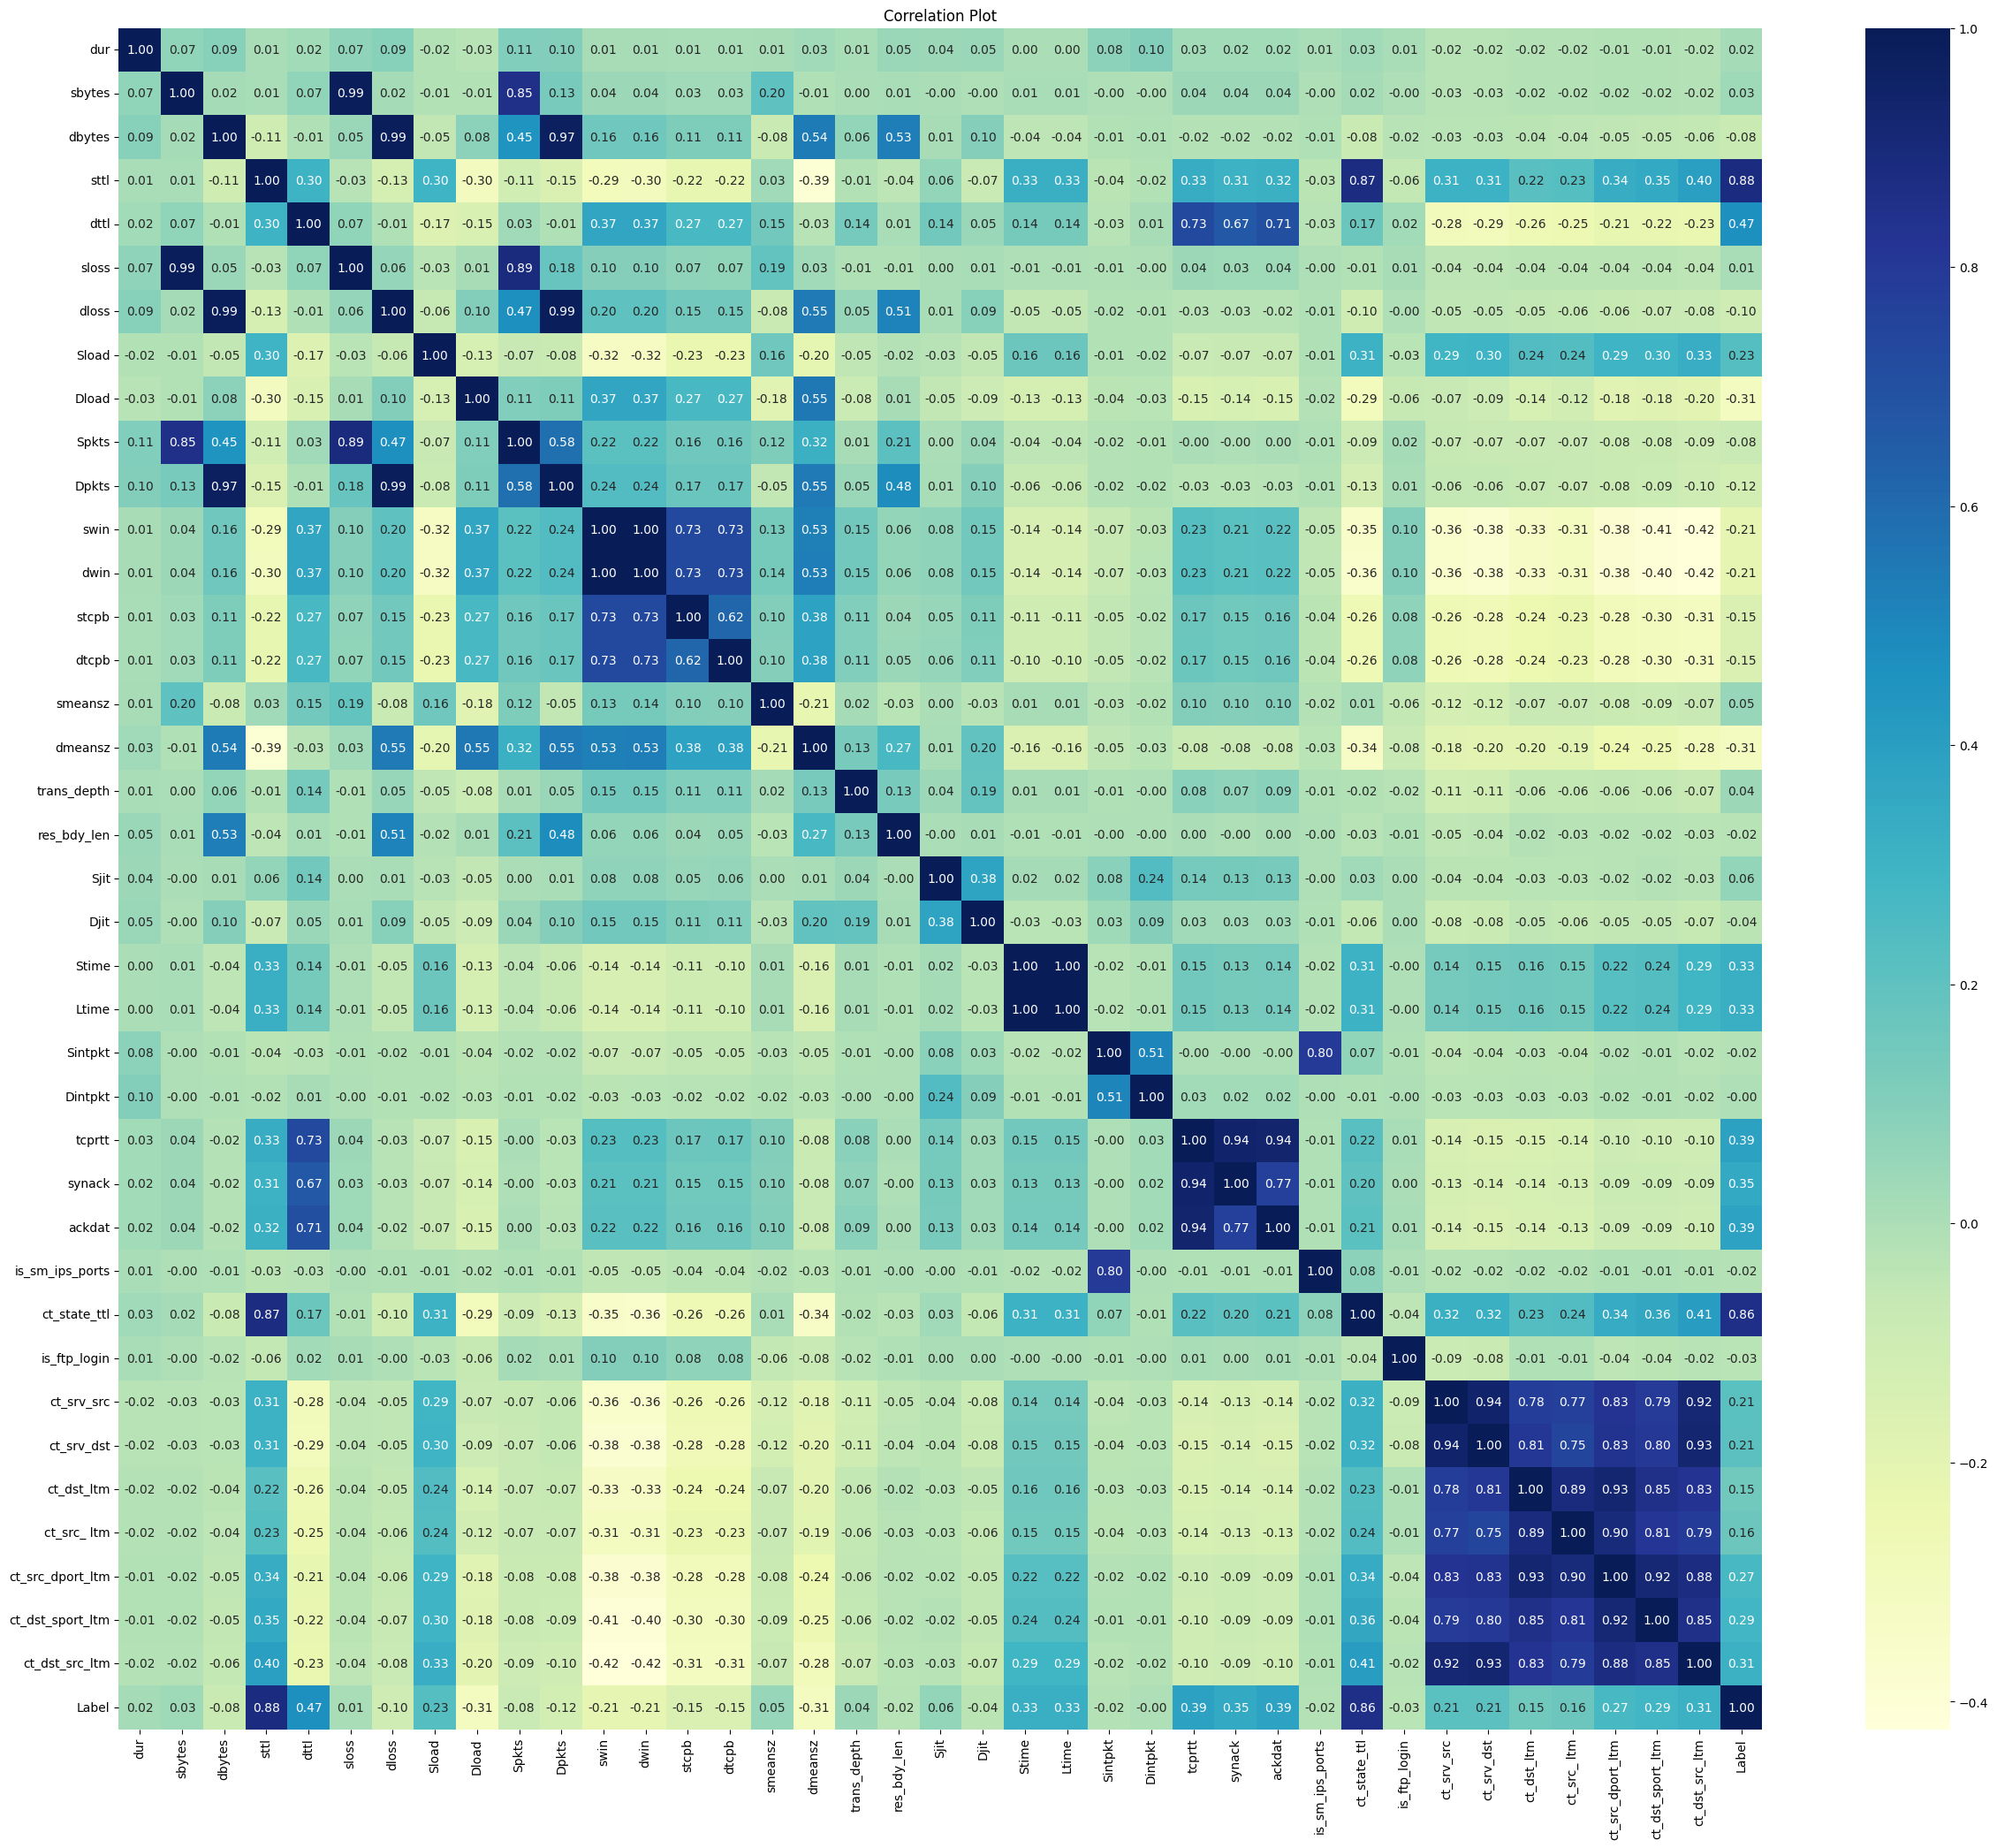

In [31]:
# Only Numeric Columns
numeric_data = df_resampled.select_dtypes(include=[float, int])

# Correlation heatmap
plt.figure(figsize=(30, 25))
plt.title("Correlation Plot")

sns.heatmap(
    numeric_data.corr(), 
    cmap='YlGnBu', 
    annot=True, 
    fmt=".2f")

plt.show()

Highly Correlated Features with Variances:
           Feature 1         Feature 2  Correlation  Variance Feature 1  \
0              sloss            sbytes     0.989371        2.240209e+03   
1              dloss            dbytes     0.993115        3.760550e+03   
2              Dpkts            dbytes     0.972666        1.694499e+04   
3              Dpkts             dloss     0.988294        1.694499e+04   
4               dwin              swin     0.997423        1.535679e+04   
5              Ltime             Stime     1.000000        1.270769e+12   
6             synack            tcprtt     0.944027        1.022867e-03   
7             ackdat            tcprtt     0.937753        9.227553e-04   
8         ct_srv_dst        ct_srv_src     0.943341        8.377345e+01   
9   ct_src_dport_ltm        ct_dst_ltm     0.932144        4.229358e+01   
10  ct_dst_sport_ltm  ct_src_dport_ltm     0.916323        2.112743e+01   
11    ct_dst_src_ltm        ct_srv_src     0.915841      

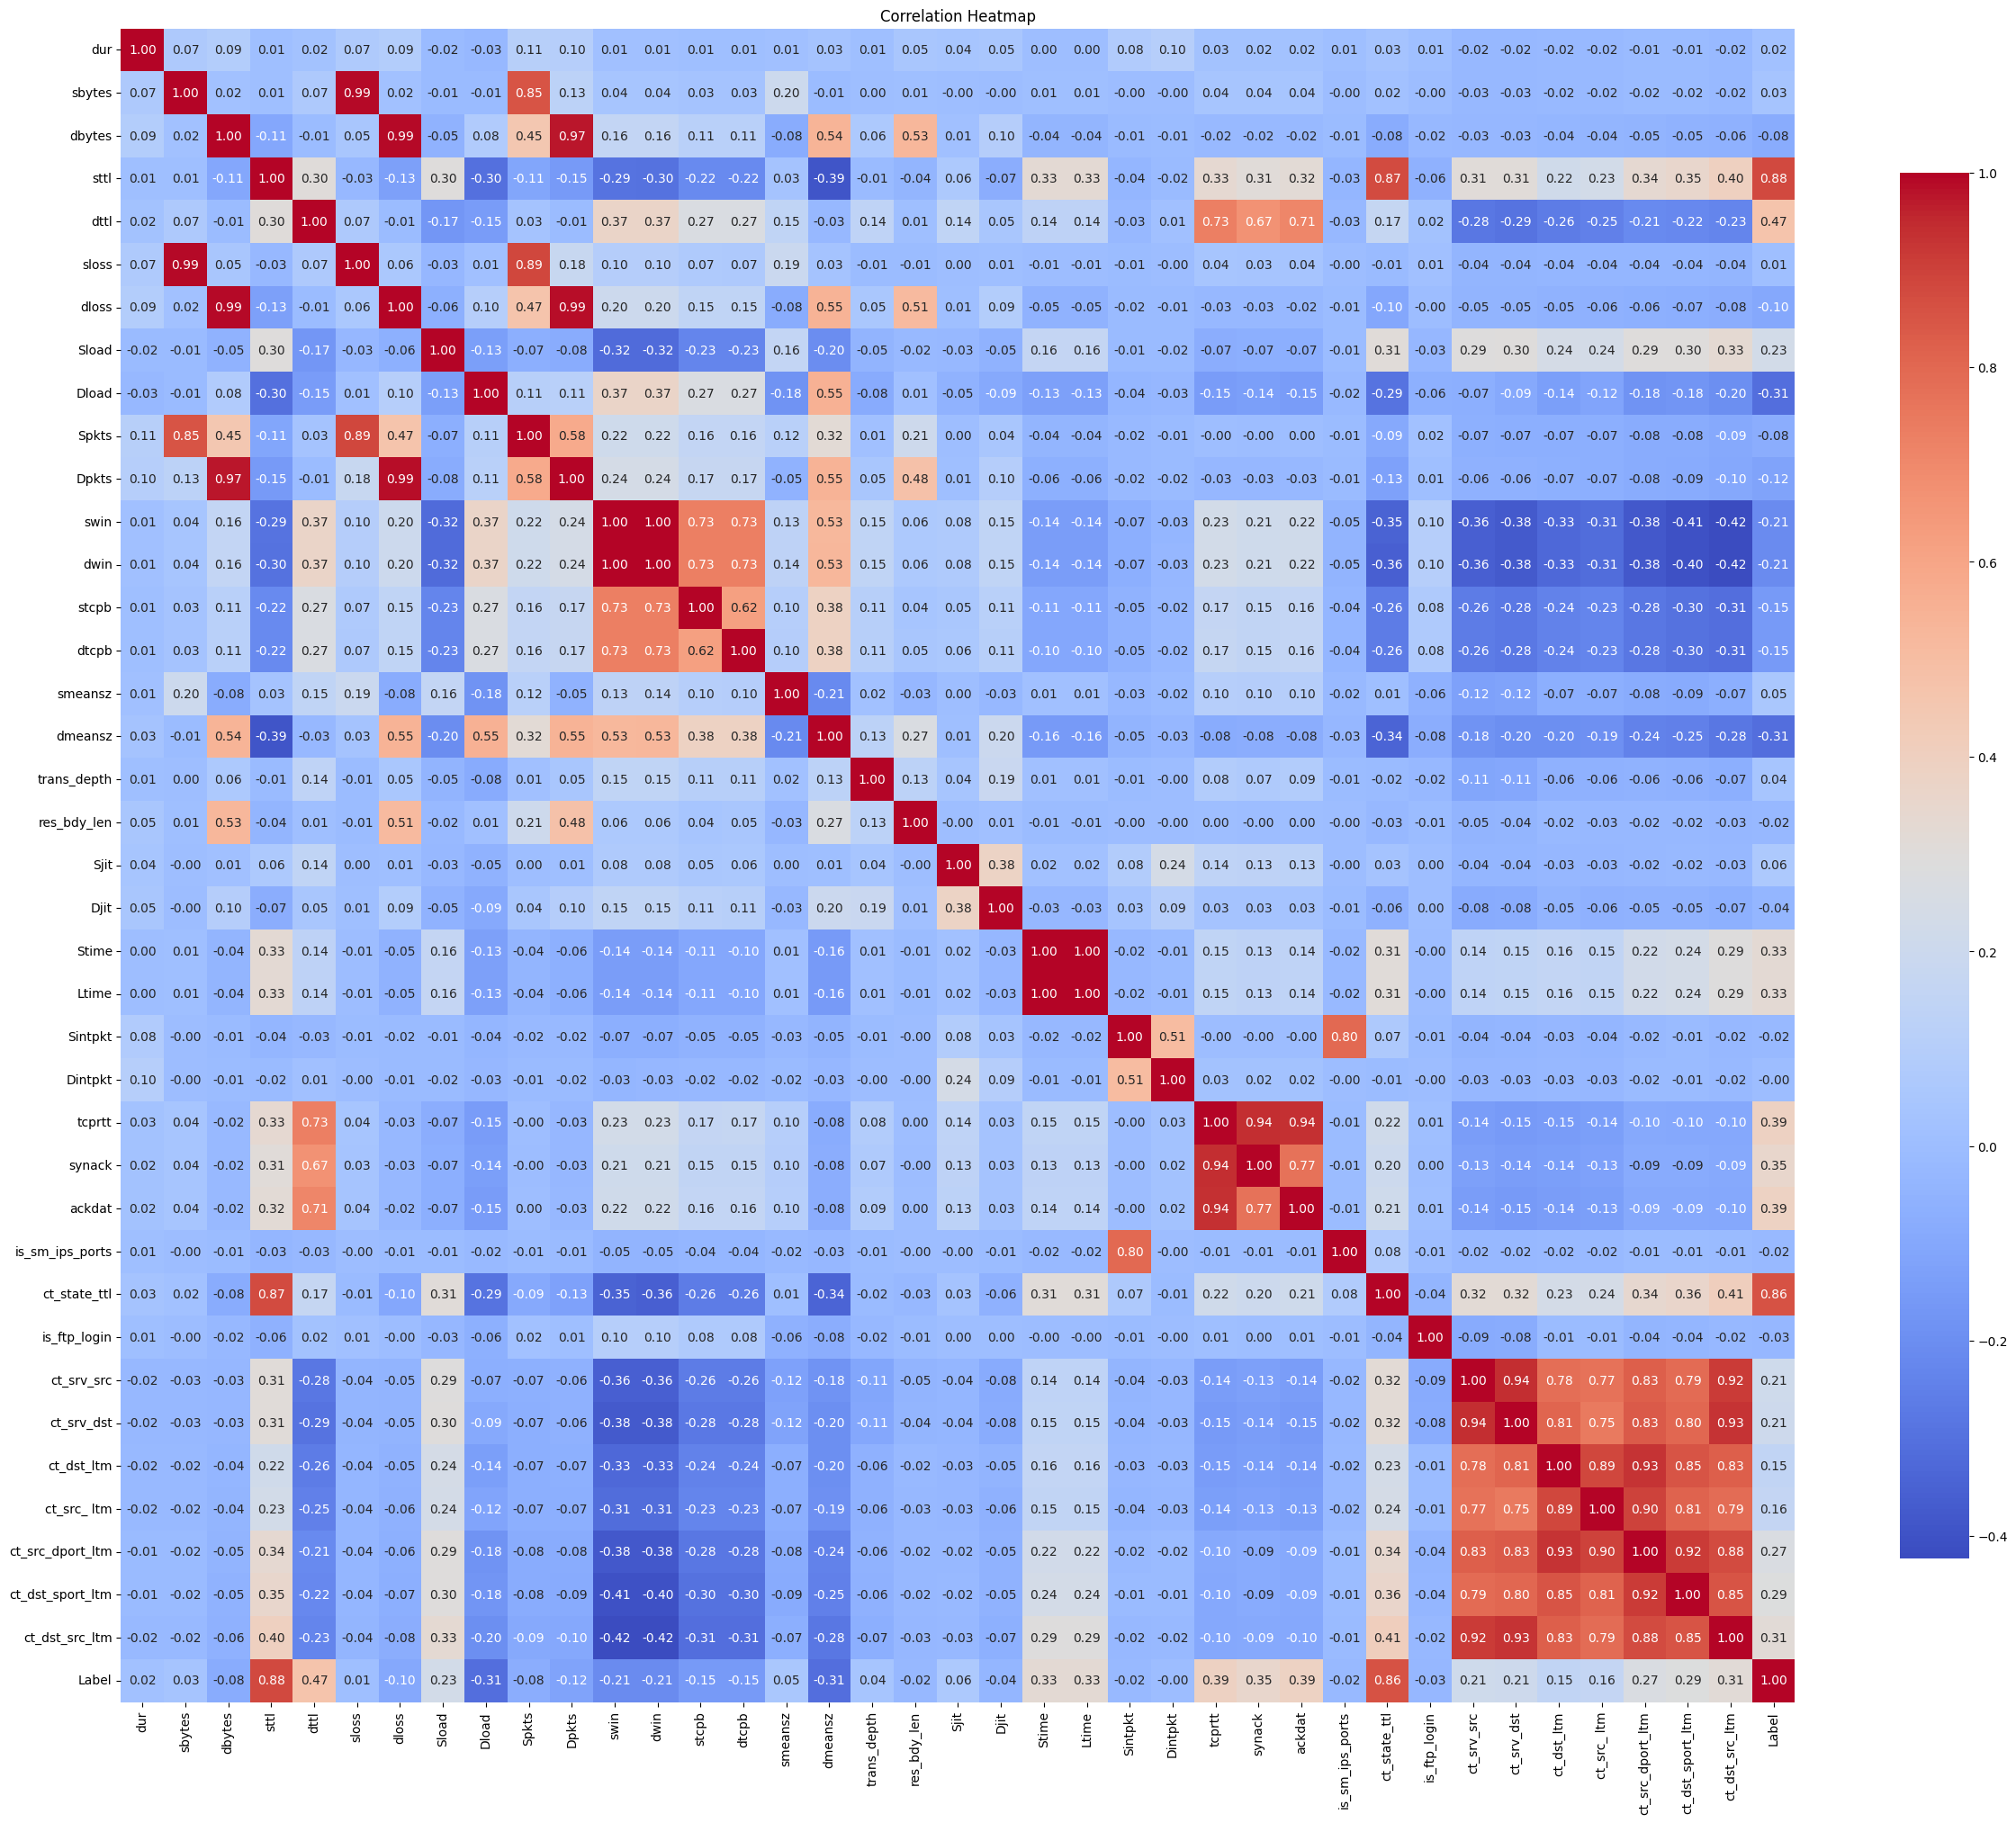

In [32]:
# Only numeric columns
numeric_columns = df_resampled.select_dtypes(include=[np.number]).columns
numeric_data = df_resampled[numeric_columns]


# Correlation matrix
corr_matrix = numeric_data.corr()


# Highly correlated features
threshold = 0.9
high_corr_pairs = []


# Variance for each numeric column
feature_variances = numeric_data.var()


# Loop through the correlation matrix to find highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append(
                (corr_matrix.columns[i],
                 corr_matrix.columns[j],
                 corr_matrix.iloc[i, j],
                 feature_variances[corr_matrix.columns[i]],
                 feature_variances[corr_matrix.columns[j]]
                 )
            )


# Convert to DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_pairs,
                            columns=['Feature 1', 'Feature 2', 'Correlation', 'Variance Feature 1', 'Variance Feature 2'])



print("Highly Correlated Features with Variances:")
print(high_corr_df)



plt.figure(figsize=(30, 25))


sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            square=True,
            cbar_kws={"shrink": .8})


plt.title('Correlation Heatmap')

plt.show()

### **NOTE**

We need to drop highly correlated columns to reduce multicollinearity and improve model interpretability, a strategic approach is required to select the columns that contribute most effectively to our model.


When selecting columns to keep among highly correlated pairs, we should usually retain the column with higher variance and drop the one with lower variance.


In [33]:
columns_to_drop = set()


# Correlated pair to drop
for feature1, feature2, corr_value, var_feature1, var_feature2 in high_corr_pairs:
    if var_feature1 > var_feature2:
        columns_to_drop.add(feature2)
    else:
        columns_to_drop.add(feature1)

# Columns with lower variance
df_resampled = df_resampled.drop(columns=columns_to_drop)
print("Total Number of Dropped columns:", len(columns_to_drop))
print()
print("Dropped columns are:", columns_to_drop)
print()
print()


print("Total Number of Remaining features after dropping highly correlated ones:",
      len(df_resampled.columns))
print()
print("Remaining features after dropping highly correlated ones:")
print(df_resampled.columns)

Total Number of Dropped columns: 11

Dropped columns are: {'dloss', 'ct_dst_ltm', 'swin', 'ct_srv_src', 'ackdat', 'Dpkts', 'Ltime', 'ct_srv_dst', 'ct_dst_sport_ltm', 'sloss', 'synack'}


Total Number of Remaining features after dropping highly correlated ones: 37

Remaining features after dropping highly correlated ones:
Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'service', 'Sload', 'Dload', 'Spkts', 'dwin',
       'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
       'Sjit', 'Djit', 'Stime', 'Sintpkt', 'Dintpkt', 'tcprtt',
       'is_sm_ips_ports', 'ct_state_ttl', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object')


# **Principal Component Analysis (PCA)**

Principal Component Analysis (PCA) is a powerful dimensionality reduction technique that can help identify the most relevant features in a dataset, especially when dealing with high-dimensional data like intrusion detection datasets.

By projecting the data into a lower-dimensional space, PCA allows you to capture the most variance with fewer features, which can be useful for improving model performance and interpretability.


    Principal Component  Explained Variance  Cumulative Variance
0                     1            0.189266             0.189266
1                     2            0.110864             0.300129
2                     3            0.081545             0.381675
3                     4            0.072505             0.454180
4                     5            0.062891             0.517070
5                     6            0.053889             0.570960
6                     7            0.051350             0.622310
7                     8            0.040749             0.663059
8                     9            0.038479             0.701538
9                    10            0.036200             0.737737
10                   11            0.034176             0.771913
11                   12            0.032986             0.804900
12                   13            0.030500             0.835399
13                   14            0.029326             0.864725
14                   15  

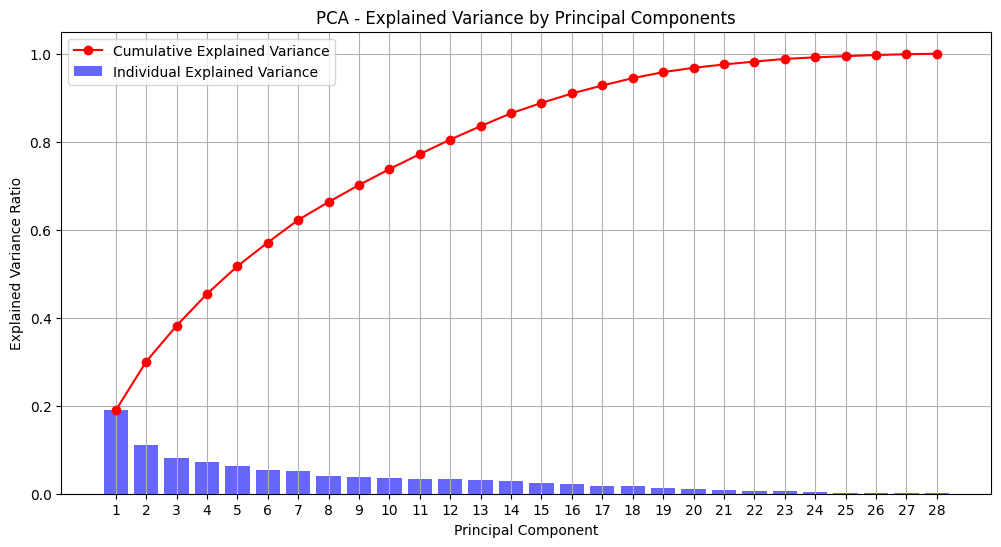

In [34]:
# Numeric columns
numeric_columns = df_resampled.select_dtypes(include=[np.number]).columns
numeric_data = df_resampled[numeric_columns]


# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


# Applying PCA
pca = PCA()
pca.fit(scaled_data)


# Analyzing results
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


# DataFrame to hold the explained variance
explained_variance_df = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})


print(explained_variance_df)


# Plot E. Var
plt.figure(figsize=(12, 6))


plt.bar(
    explained_variance_df['Principal Component'],
    explained_variance_df['Explained Variance'],
    alpha=0.6,
    color='b',
    label='Individual Explained Variance'
)


plt.plot(explained_variance_df['Principal Component'], 
         explained_variance_df['Cumulative Variance'],
         marker='o', 
         color='r', 
         label='Cumulative Explained Variance')


plt.title('PCA - Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')


plt.xticks(np.arange(1, len(explained_variance_df) + 1))


plt.legend()
plt.grid()
plt.show()

### Choosing the Number of Components

From our cumulative variance, it appears that:

- The first 5 components capture approximately 55% of the variance.
- The first 10 components capture about 79% of the variance.
- To achieve over 90% variance, we'll need around 15-20 components.

Given this analysis, we can proceed with 15/20 components for PCA, as this allows for a good balance between dimensionality reduction and the retention of information.


# **Feature Engineering**


In [35]:
def generate_features(df_resampled):
    # Ratios
    df_resampled['byte_ratio'] = df_resampled['sbytes'] / (df_resampled['dbytes'] + 1)
    df_resampled['load_ratio'] = df_resampled['Sload'] / (df_resampled['Dload'] + 1)
    df_resampled['jit_ratio'] = df_resampled['Sjit'] / (df_resampled['Djit'] + 1)


    # Aggregate Features
    df_resampled['total_bytes'] = df_resampled['sbytes'] + df_resampled['dbytes']
    df_resampled['total_load'] = df_resampled['Sload'] + df_resampled['Dload']
    df_resampled['total_jitter'] = df_resampled['Sjit'] + df_resampled['Djit']


    # Interaction Features
    df_resampled['byte_pkt_interaction_src'] = df_resampled['sbytes'] * df_resampled['Spkts']
    df_resampled['load_jit_interaction_src'] = df_resampled['Sload'] * df_resampled['Sjit']
    df_resampled['load_jit_interaction_dst'] = df_resampled['Dload'] * df_resampled['Djit']
    df_resampled['pkt_jit_interaction_src'] = df_resampled['Spkts'] * df_resampled['Sjit']


    # Statistical Features
    df_resampled['tcp_seq_diff'] = df_resampled['stcpb'] - df_resampled['dtcpb']



    return df_resampled


generate_features(df_resampled)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,load_ratio,jit_ratio,total_bytes,total_load,total_jitter,byte_pkt_interaction_src,load_jit_interaction_src,load_jit_interaction_dst,pkt_jit_interaction_src,tcp_seq_diff
0,175.45.176.3,1043,149.171.126.15,53,udp,INT,0.000009,114,0,254,...,5.066666e+07,0.000000,114,5.066666e+07,0.000000,228,0.000000e+00,0.000000e+00,0.000000,0
1,175.45.176.3,58086,149.171.126.14,179,tcp,FIN,0.636317,1506,268,254,...,6.051422e+00,21.180269,1774,1.986431e+04,3534.042336,15060,5.754869e+07,4.460245e+05,33756.645390,2351307204
2,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000007,264,0,60,...,1.508571e+08,0.000000,264,1.508571e+08,0.000000,528,0.000000e+00,0.000000e+00,0.000000,0
3,59.166.0.6,41318,149.171.126.4,53,udp,CON,0.001053,146,178,31,...,8.202234e-01,0.000000,324,1.230769e+06,0.000000,292,0.000000e+00,0.000000e+00,0.000000,0
4,59.166.0.9,32717,149.171.126.2,57035,tcp,FIN,0.039853,2854,31402,31,...,9.080263e-02,64.197833,34256,6.732743e+06,64.197833,131284,3.598030e+07,0.000000e+00,2953.100318,2119313877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721278,59.166.0.5,27079,149.171.126.0,6881,tcp,FIN,0.017937,1540,1644,31,...,9.298120e-01,24.331311,3184,1.336678e+06,74.469903,24640,4.668625e+07,1.370964e+06,1159.849440,2143757242
721279,59.166.0.2,18950,149.171.126.9,80,tcp,FIN,1.007003,1684,10168,31,...,1.628467e-01,1.142017,11852,8.872268e+04,16441.134235,23576,1.089191e+08,5.855851e+08,122725.818600,-985507
721280,59.166.0.5,11307,149.171.126.8,53,udp,CON,0.001099,146,178,31,...,8.202235e-01,0.000000,324,1.179254e+06,0.000000,292,0.000000e+00,0.000000e+00,0.000000,0
721281,175.45.176.0,61365,149.171.126.16,8482,udp,INT,0.000009,280,0,254,...,1.244444e+08,0.000000,280,1.244444e+08,0.000000,560,0.000000e+00,0.000000e+00,0.000000,0


# **Splitting the features in dependent and independent features**


In [36]:
print("Columns in the dataset:")
print(df_resampled.columns)



# One-hot encode 'proto' and 'service' only
columns_to_encode = ['proto', 'service']
available_columns_to_encode = [col for col in columns_to_encode if col in df_resampled.columns]



if available_columns_to_encode:
    df_resampled = pd.get_dummies(df_resampled, columns=available_columns_to_encode, drop_first=True)
    print(f"One-hot encoded columns: {available_columns_to_encode}")
else:
    print(f"Columns {columns_to_encode} not found in the dataset.")



# Categorical columns
categorical_columns = df_resampled.select_dtypes(include=['object']).columns
print("Categorical columns are: \n", categorical_columns)



# Convert IP addresses to integers
def ip_to_int(ip):
    try:
        return int(ipaddress.ip_address(ip))
    except ValueError:
        return 0



# LabelEncoder for encoding categorical columns
label_encoder = LabelEncoder()




for col in categorical_columns:
    if 'ip' in col.lower():  
        # IP columns to integers
        df_resampled[col] = df_resampled[col].apply(ip_to_int)
    else:  
        # Convert to string and apply label encoding
        df_resampled[col] = df_resampled[col].astype(str)
        df_resampled[col] = label_encoder.fit_transform(df_resampled[col])


print("Updated data types:\n", df_resampled.dtypes)


Columns in the dataset:
Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'service', 'Sload', 'Dload', 'Spkts', 'dwin',
       'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
       'Sjit', 'Djit', 'Stime', 'Sintpkt', 'Dintpkt', 'tcprtt',
       'is_sm_ips_ports', 'ct_state_ttl', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label', 'byte_ratio', 'load_ratio', 'jit_ratio', 'total_bytes',
       'total_load', 'total_jitter', 'byte_pkt_interaction_src',
       'load_jit_interaction_src', 'load_jit_interaction_dst',
       'pkt_jit_interaction_src', 'tcp_seq_diff'],
      dtype='object')
One-hot encoded columns: ['proto', 'service']
Categorical columns are: 
 Index(['srcip', 'sport', 'dstip', 'dsport', 'state', 'ct_ftp_cmd',
       'attack_cat'],
      dtype='object')
Updated data types:
 srcip             int64
sport             int32
dstip

In [37]:
label_mapping = dict(
    zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Label Mapping:", label_mapping)

Label Mapping: {'Analysis': 0, 'Backdoor': 1, 'DoS': 2, 'Exploits': 3, 'Fuzzers': 4, 'Generic': 5, 'Normal': 6, 'Reconnaissance': 7, 'Shellcode': 8, 'Worms': 9}


In [38]:
# Features and Target
x = df_resampled.drop('attack_cat', axis=1)
y = df_resampled['attack_cat']

# **Applying SMOTE to balance the unbalanced data**


SMOTE stands for Synthetic Minority Oversampling Technique, a statistical method for balancing the distribution of classes in a dataset.


In [39]:
# Number of samples for each class
desired_count = 35000

# Class distribution
class_counts = y.value_counts()





# Oversampling Strategie
oversample_strategy = {cls: desired_count for cls,
                       count in class_counts.items() if count < desired_count}

# SMOTE pipeline
smote = SMOTE(sampling_strategy=oversample_strategy)







# Undersampling Strategie
undersample_strategy = {cls: desired_count for cls,
                        count in class_counts.items() if count > desired_count}

# RandomUnderSampler pipeline
undersample = RandomUnderSampler(sampling_strategy=undersample_strategy)






pipeline = Pipeline(
    steps=[('smote', smote), 
           ('undersample', undersample)]
    )




print("Before resampling:\n", y.value_counts())
print("\n\n")


# Pipeline
x_resampled, y_resampled = pipeline.fit_resample(x, y)


print("After resampling:\n", y_resampled.value_counts())

Before resampling:
 attack_cat
6    378613
5     46093
3     30269
4     22387
7     13507
2      7292
0      2336
1      2066
8      1511
9       172
Name: count, dtype: int64



After resampling:
 attack_cat
0    35000
1    35000
2    35000
3    35000
4    35000
5    35000
6    35000
7    35000
8    35000
9    35000
Name: count, dtype: int64


In [40]:
x = x_resampled
y = y_resampled

# **Checking Feature Importance**


In [47]:
# Discrete features (integers and booleans are considered discrete)
discrete_features = x.dtypes.apply(lambda dtype: pd.api.types.is_integer_dtype(dtype) or pd.api.types.is_bool_dtype(dtype))

In [49]:
# The MI score
def mi_score_maker(x, y, discrete_features):
    # Mutual information scores for classification task
    scores = mutual_info_classif(
        x, 
        y, 
        discrete_features=discrete_features
    )
    
    # DataFrame with feature names and MI scores
    df_resampled = pd.DataFrame({
        'Features': x.columns,
        'Scores': scores
    })
    
    # Sort by MI score in descending order
    df_resampled = df_resampled.sort_values(['Scores'], ascending=False).reset_index(drop=True)
    
    return df_resampled



# MI scores calculation
mi_scores = mi_score_maker(
    x, 
    y.astype('float64'),
    discrete_features
)


# MI scores
print(mi_scores)

c:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:290: RuntimeWarning:

invalid value encountered in cast

c:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

c:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:290: RuntimeWarning:

invalid value encountered in cast

c:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

c:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:290: RuntimeWarning:

invalid value encountered in cast

c:\Users\avina\AppData\Local

                     Features    Scores
0    byte_pkt_interaction_src  1.610581
1                 total_bytes  1.445618
2                  byte_ratio  1.361970
3                      sbytes  1.357375
4                      dsport  1.335852
..                        ...       ...
185            service_radius  0.000097
186                proto_icmp  0.000086
187                 proto_esp  0.000000
188                 proto_rtp  0.000000
189                proto_igmp  0.000000

[190 rows x 2 columns]


In [51]:
# Filter features with scores less than 0.01
low_score_features = mi_scores[mi_scores['Scores'] < 0.01]
low_score_feature_names = low_score_features['Features'].tolist()


low_score_feature_names

['proto_sctp',
 'is_ftp_login',
 'service_ssh',
 'proto_any',
 'proto_vmtp',
 'proto_cftp',
 'proto_rsvp',
 'proto_qnx',
 'proto_ptp',
 'proto_scps',
 'proto_gre',
 'proto_sun-nd',
 'proto_iso-ip',
 'proto_swipe',
 'proto_il',
 'service_irc',
 'proto_fire',
 'proto_ddx',
 'proto_pvp',
 'proto_eigrp',
 'proto_sps',
 'proto_dcn',
 'proto_mobile',
 'proto_ipv6-route',
 'proto_wb-mon',
 'proto_mhrp',
 'proto_sep',
 'proto_ippc',
 'proto_vrrp',
 'proto_crudp',
 'proto_ddp',
 'proto_sccopmce',
 'proto_pim',
 'proto_ipv6',
 'proto_ifmp',
 'proto_br-sat-mon',
 'proto_compaq-peer',
 'proto_bbn-rcc',
 'proto_sat-mon',
 'proto_dgp',
 'proto_pgm',
 'proto_nvp',
 'proto_ipv6-no',
 'proto_ipcv',
 'proto_narp',
 'proto_encap',
 'proto_micp',
 'proto_mtp',
 'service_snmp',
 'proto_ttp',
 'proto_trunk-1',
 'proto_xtp',
 'proto_stp',
 'proto_skip',
 'proto_visa',
 'proto_a/n',
 'proto_ipcomp',
 'proto_aris',
 'proto_mfe-nsp',
 'proto_zero',
 'proto_xnet',
 'proto_kryptolan',
 'proto_xns-idp',
 'proto_cp

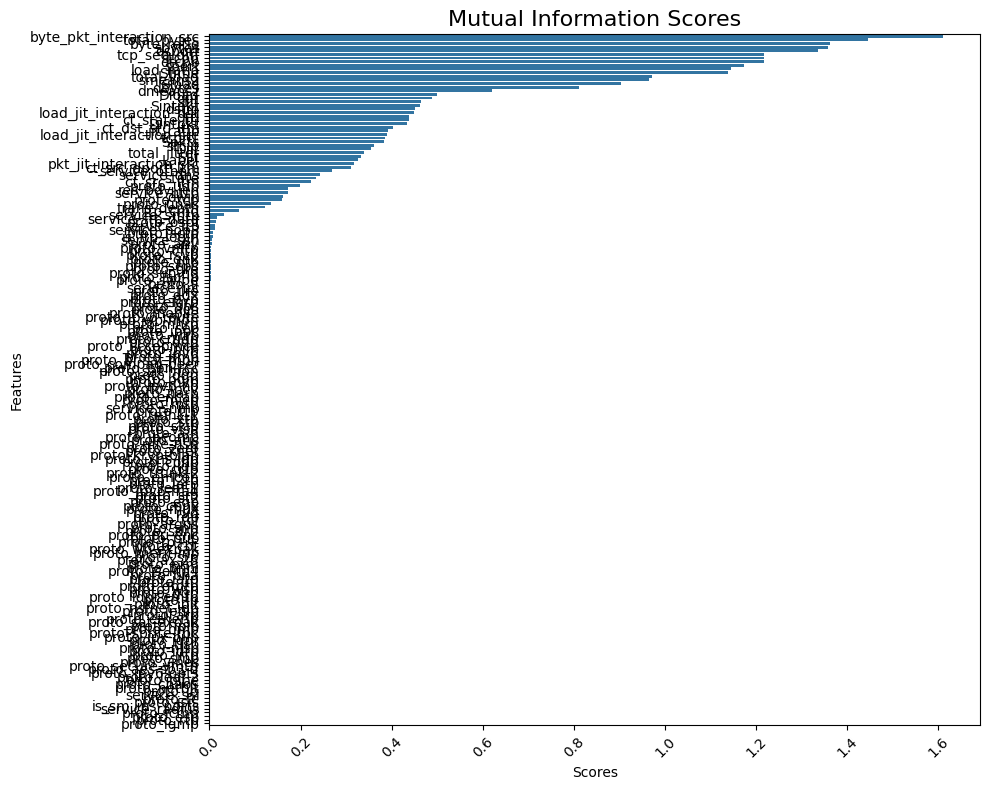

In [52]:
# Plot MI scores
plt.figure(figsize=(10, 8))

sns.barplot(
    x='Scores', 
    y='Features',
    data=mi_scores
)

plt.title("Mutual Information Scores", fontsize=16)

plt.yticks(rotation=0)
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

In [53]:
# Drop low-score features
x.drop(low_score_feature_names, axis=1, inplace=True)

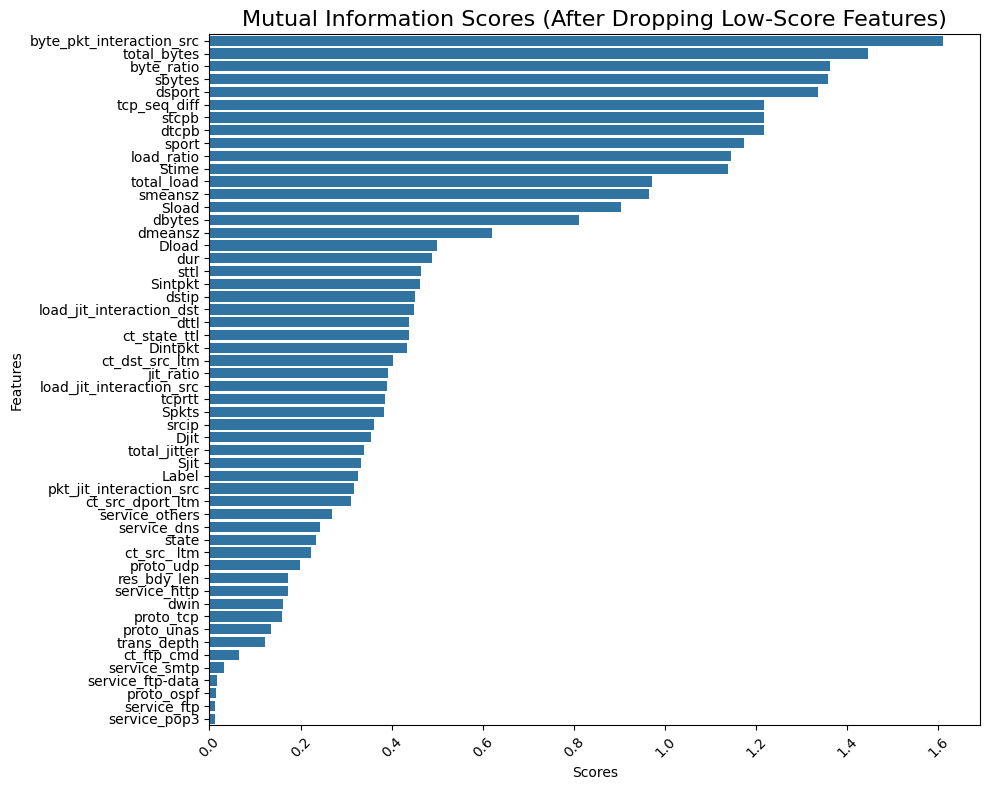

In [54]:
# Plot MI scores after dropping low-score features
plt.figure(figsize=(10, 8))
sns.barplot(x='Scores', y='Features', data=mi_scores[~mi_scores['Features'].isin(low_score_feature_names)])
plt.title("Mutual Information Scores (After Dropping Low-Score Features)", fontsize=16)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Feature Scaling**


In [55]:
scaler = StandardScaler()

In [56]:
x_scaled = scaler.fit_transform(x)

# **Checking Variance captured by features**

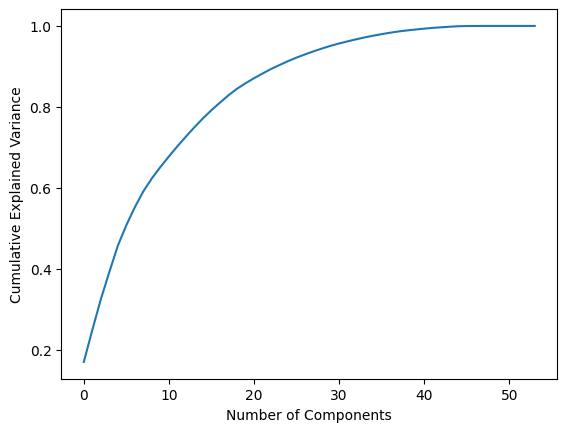

In [57]:
pca = PCA()
pca.fit(x_scaled) 
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


1. Rapid Increase Initially: The curve increases sharply for the first few components, indicating that the first few principal components explain a large portion of the variance in the data. This suggests that much of the information (variance) in the original dataset can be captured with just a few components.

2. Plateauing Effect: After a certain point (around 20–25 components), the curve starts to flatten, indicating that adding more components contributes less and less to the explained variance. This suggests that these additional components are capturing only minor details or noise rather than significant patterns.

3. Choosing Number of Components: To balance dimensionality reduction and information retention, you could select a number of components that captures, say, 90-95% of the cumulative explained variance. In this graph, that would correspond to around 20-30 components, depending on the exact threshold we can choose.

# **Dividing in train-test-split**


In [58]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [59]:
# Ensure y_train and y_test are 1D arrays
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

In [60]:
# Arrays to DataFrames and save as CSV
pd.DataFrame(x_train_scaled).to_csv('./DATASET/EDA-DATASET/x_train_scaled.csv', index=False)
pd.DataFrame(x_test_scaled).to_csv('./DATASET/EDA-DATASET/x_test_scaled.csv', index=False)
pd.DataFrame(y_train).to_csv('./DATASET/EDA-DATASET/y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('./DATASET/EDA-DATASET/y_test.csv', index=False)